Methods to generate plots for static accuracy / misalignment experiments

In [2]:
from analysis import bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np

### Misalignment datasets

Start by plotting curves / accuracy for all datasets individually 

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized (R-R0) / R0. ADC min:  -161.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized (R-R0) / R0. ADC min:  -143.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/20 deg\\Bending_data_abs_1p93_20deg_12_12_24.csv']
ADC normalized (R-R0) / R0. ADC min:  -147.0


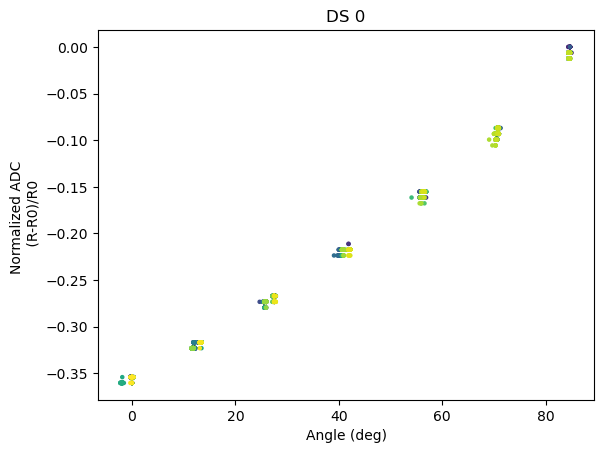

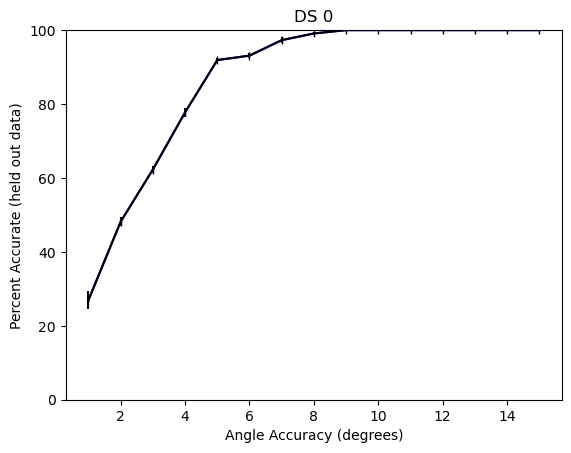

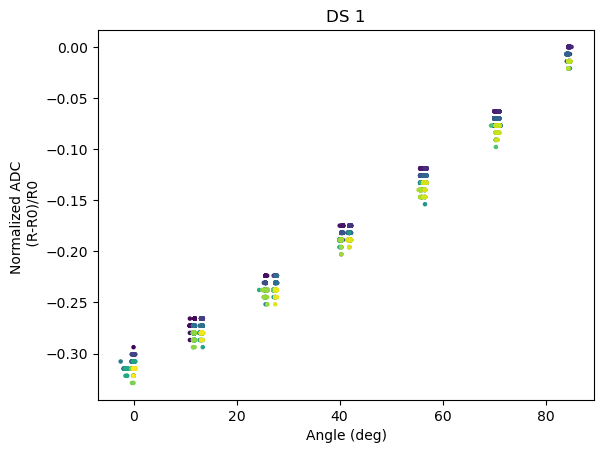

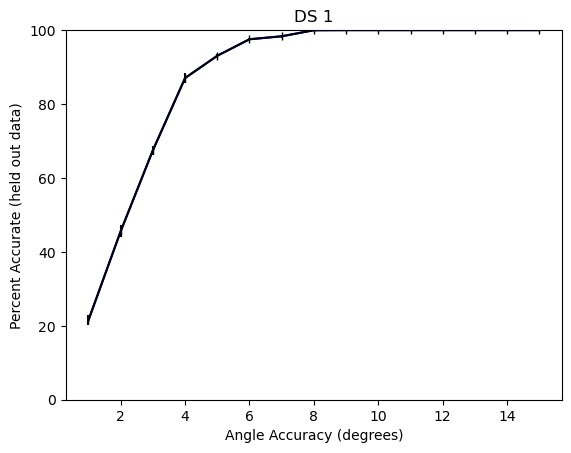

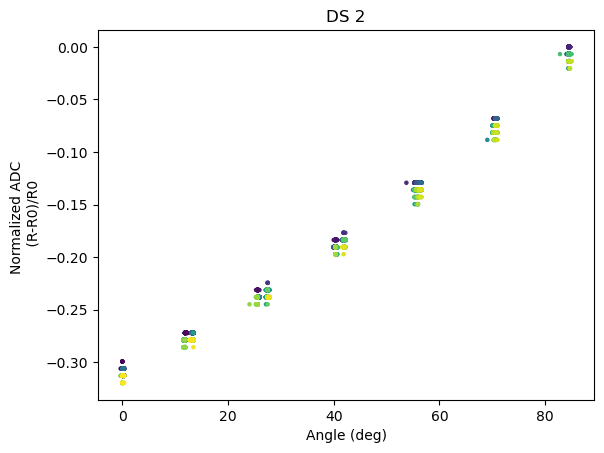

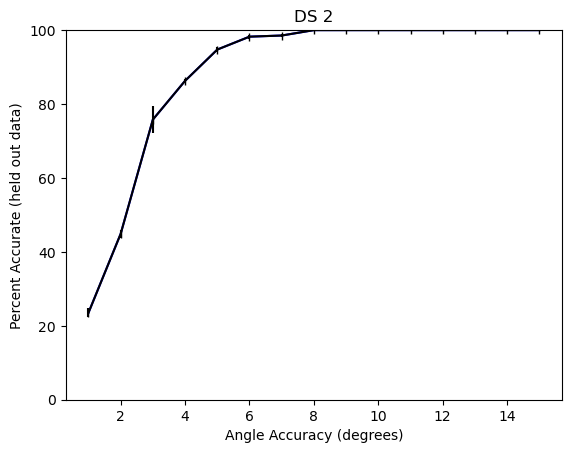

In [6]:
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/0 deg/*.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/8 deg/*.csv")
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/20 deg/*.csv")


DS_all = [DS1_datafiles, DS2_datafiles, DS3_datafiles]

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.plot_data(scatter=True, title='DS %d'%i_d)

    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

Using normalize_adc_bw_01():: Now fit model on dataset 1 and test on dataset 2 and 3 etc. 

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized bw 0-1. ADC max:  -103.0 ADC min:  -161.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -96.0 ADC min:  -143.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/20 deg\\Bending_data_abs_1p93_20deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -100.0 ADC min:  -147.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  -96.0 ADC min:  -143.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p

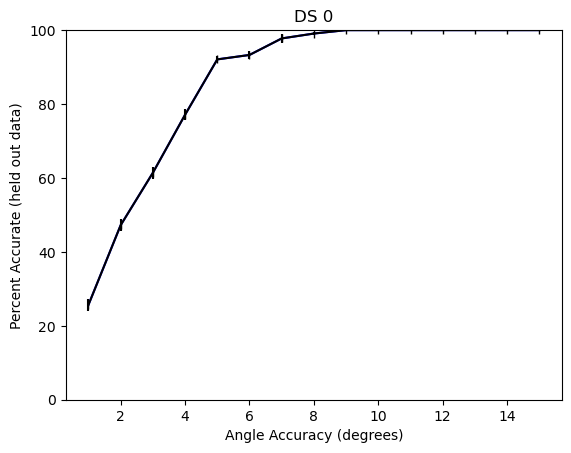

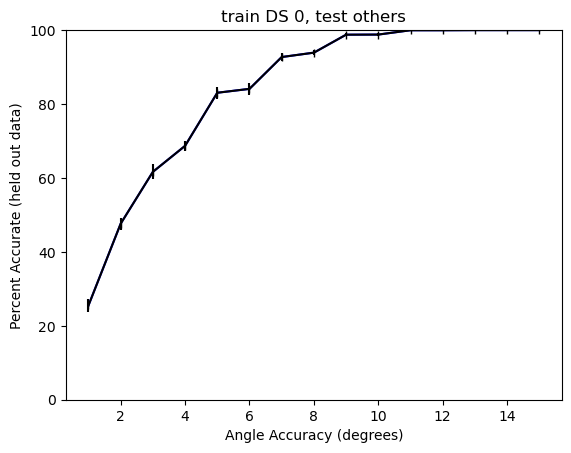

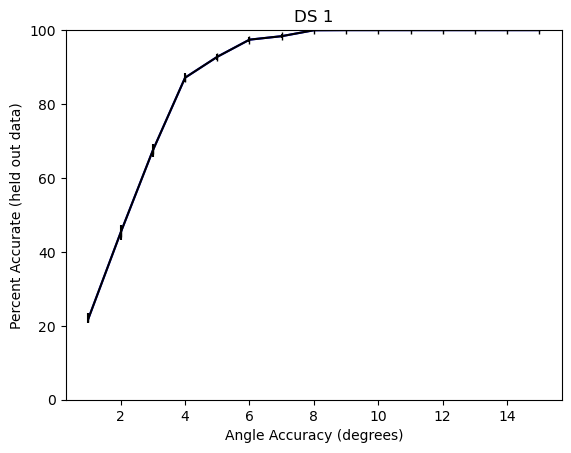

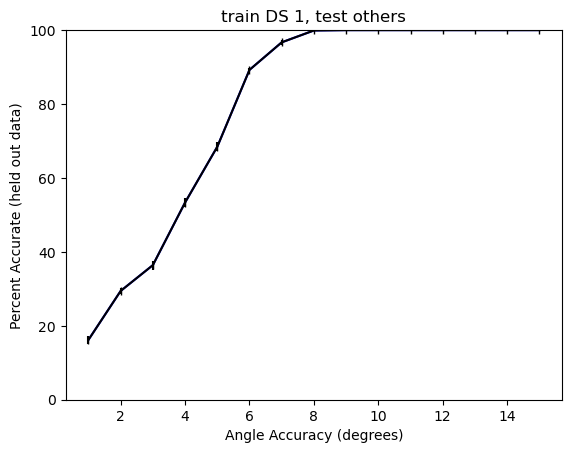

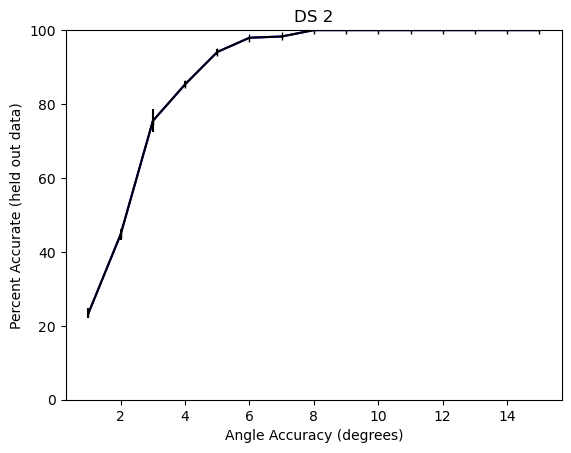

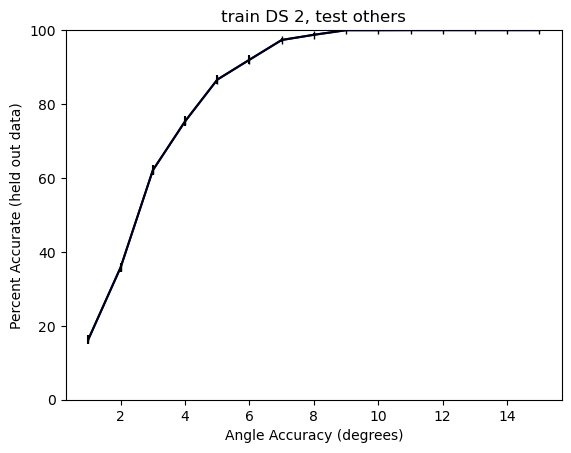

In [5]:
# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_bw_01()
    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

    ## Now test data on other datasets
    ixs = [0, 1, 2]
    ixs.remove(i_d)
    
    ## Iterate over other datasets 
    g2 = bender_class()
    g2.load_data(DS_all[ixs[0]])
    g2.normalize_adc_bw_01()
    g3 = bender_class()
    g3.load_data(DS_all[ixs[1]])
    g3.normalize_adc_bw_01()
   

    df_combined = pd.concat([g2.data, g3.data], ignore_index=True)

    acc = []; 
    for i in range(10): 
        _, dftest = train_test_split(df_combined, test_size=0.1, shuffle=True)
        acc.append(g.predict_new_data(dftest))
    acc = np.vstack((acc))
    
    g.plot_accuracy(title='train DS %d, test others'%i_d, accuracy=acc)
